- Neural Networks
- Florent Dufour
- 2016 - 2022

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from   tensorflow import keras

In [3]:
# Dataset & Problem: MNIST fashion dataset
fashion_nmist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_nmist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
train_images.shape # 60'000 inages that are 18x18 pixels

(60000, 28, 28)

In [5]:
type(train_images)
train_images[:10] # .head()
# A pixel is a value between 0 - 255

array([[[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       ...,

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0

In [6]:
train_labels[:10] # 10 types of clothing
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

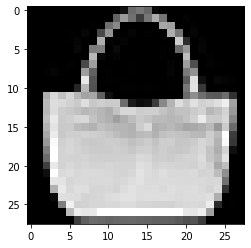

In [32]:
# Plot images
def plot(dataset, index):
  plt.figure()
  plt.imshow(dataset[index], cmap='gray')
  plt.show()

plot(train_images, 100)

In [8]:
# Data pre-processing
## Get all the value bertween 0 - 1

train_images = train_images / 255.0
test_images = test_images / 255.0

In [9]:
# Build the model

model = keras.Sequential([ # As ooposed ot recurrent or conv nn
  keras.layers.Flatten(input_shape=(28, 28)), # Input layer, flattened by keras
  keras.layers.Dense(128, activation='relu'),  # Hidden layer
  keras.layers.Dense(10, activation='softmax') # Output layer, as many neurones as classes !
]) # Softmax gives us a probability distribution: Everything between 0 - 1 / And add up to 1 !

# Compile the model

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
# Train the model

model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1979 - accuracy: 0.9259
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1931 - accuracy: 0.9270
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1870 - accuracy: 0.9295
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1812 - accuracy: 0.9311
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1769 - accuracy: 0.9332
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1736 - accuracy: 0.9348
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1703 - accuracy: 0.9348
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1648 - accuracy: 0.9370
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1603 - accuracy: 0.9390
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.157

In [16]:
# Test the model
## Accuracy above is for the training data
## True accuracy should be computed on test data

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)

# Accuracy is lower (88% vs. 91%): Model is overfitting (!)
# Model is bad at generalising, we eed to do 

313/313 [==============================] - 1s 2ms/step - loss: 0.3735 - accuracy: 0.8910


Predicted T-shirt/top


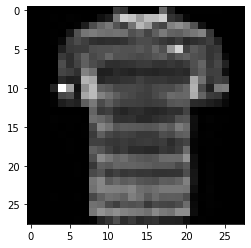

Label T-shirt/top


In [43]:
# User the model for prediction

predictions = model.predict(test_images)
predictions # Every image has a list of prediction associated

index = 35
print("Predicted", class_names[np.argmax(predictions[index])])
plot(test_images, index)
print("Label", class_names[test_labels[index]])